# Processing and visualisation

In [2]:
import pandas as pd

data_dir = '/Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/'
# First we want to map between the dataset with the LC-MS results and the raw data columns
evseq_df = pd.read_csv(f'{data_dir}ep_EVSeqL/20240422-YL.csv', index_col=0)
evseq_df['id'] = [f'{p[0]}_{p[1]}' for p in evseq_df[['Plate', 'Well']].values]
# 300-1.csv 
evseq_df

,barcode_plate,Plate,Well,Variant,Alignment Count,Average mutation frequency,P value,P adj. value,Mutations,nc_variant,aa_variant,id
0,1,300-1,A1,#N.A.#,0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,300-1_A1
96,2,300-2,A1,#N.A.#,0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,300-2_A1
144,2,300-2,E1,#N.A.#,0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,300-2_E1
145,2,300-2,E2,#N.A.#,0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,300-2_E2
207,3,500-1,B4,#N.A.#,0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,500-1_B4
...,...,...,...,...,...,...,...,...,...,...,...,...
239,3,500-1,D12,G510A,124,0.959677,2.780000e-199,2.670000e-197,W170*,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,500-1_D12
108,2,300-2,B1,#PARENT#,132,NaN,NaN,NaN,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,300-2_B1
130,2,300-2,C11,G489DEL,149,0.966443,3.090000e-232,2.960000e-230,-,Deletion,Deletion,300-2_C11
181,2,300-2,H2,T526C_A528C_C529G_G532DEL_T533DEL_A534DEL_G535...,198,0.794765,0.000000e+00,0.000000e+00,-,Deletion,Deletion,300-2_H2


In [3]:
# Also get all the LC-MS data
import os

files = os.listdir(f'{data_dir}lcms-processed/')
data_df = pd.DataFrame()
for f in files:
    df = pd.read_csv(f'{data_dir}lcms-processed/{f}')
    # Make the ID based on the filename
    plate_id = f.split('.csv')[0]
    df['Plate'] = plate_id
    # Now add in the actual ID too
    df['id'] = [f'{p[0]}_{p[1]}' for p in df[['Plate', 'Well']].values]
    data_df = pd.concat([data_df, df])
data_df

,Well,Row,Column,Plate,cis,trans,id,Variant,Normalized Activity
0,A1,A,1,500-2,1.060808e+04,0.000000e+00,500-2_A1,NaN,NaN
1,A2,A,2,500-2,5.961494e+05,4.705581e+05,500-2_A2,NaN,NaN
2,A3,A,3,500-2,8.323569e+05,7.204202e+05,500-2_A3,NaN,NaN
3,A4,A,4,500-2,5.993150e+05,4.741821e+05,500-2_A4,NaN,NaN
4,A5,A,5,500-2,1.650538e+05,1.827627e+05,500-2_A5,NaN,NaN
...,...,...,...,...,...,...,...,...,...
91,H8,H,8,300-1,0.000000e+00,0.000000e+00,300-1_H8,Sterile,0.0000
92,H9,H,9,300-1,8.062858e+04,8.377119e+04,300-1_H9,Variant,-3142.6048
93,H10,H,10,300-1,2.125053e+06,1.702450e+06,300-1_H10,Variant,422602.6030
94,H11,H,11,300-1,3.598001e+05,3.347269e+05,300-1_H11,Variant,25073.1457


In [4]:
# Set the index for both of them 
data_df.set_index('id', inplace=True)
evseq_df.set_index('id', inplace=True)
df = data_df.join(evseq_df, how='inner', lsuffix='_data')
df

,Well_data,Row,Column,Plate_data,cis,trans,Variant_data,Normalized Activity,barcode_plate,Plate,Well,Variant,Alignment Count,Average mutation frequency,P value,P adj. value,Mutations,nc_variant,aa_variant
id,,,,,,,,,,,,,,,,,,,
500-2_A1,A1,A,1,500-2,1.060808e+04,0.000000e+00,NaN,NaN,4,500-2,A1,#N.A.#,0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
500-2_A2,A2,A,2,500-2,5.961494e+05,4.705581e+05,NaN,NaN,4,500-2,A2,#N.A.#,0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
500-2_A3,A3,A,3,500-2,8.323569e+05,7.204202e+05,NaN,NaN,4,500-2,A3,T326G,22,0.863636,2.290000e-29,2.200000e-27,M109R,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
500-2_A4,A4,A,4,500-2,5.993150e+05,4.741821e+05,NaN,NaN,4,500-2,A4,#PARENT#,12,NaN,NaN,NaN,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
500-2_A5,A5,A,5,500-2,1.650538e+05,1.827627e+05,NaN,NaN,4,500-2,A5,T21C_G25DEL_A179T_A240T_A320G,21,0.980952,1.180000e-140,1.130000e-138,-,Deletion,Deletion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300-1_H8,H8,H,8,300-1,0.000000e+00,0.000000e+00,Sterile,0.0000,1,300-1,H8,NaN,7,NaN,NaN,NaN,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
300-1_H9,H9,H,9,300-1,8.062858e+04,8.377119e+04,Variant,-3142.6048,1,300-1,H9,T317A_A562G,66,0.915385,3.200000e-177,3.070000e-175,L106*_T188A,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
300-1_H10,H10,H,10,300-1,2.125053e+06,1.702450e+06,Variant,422602.6030,1,300-1,H10,T21C_T289C_T326C,52,0.532051,3.830000e-82,3.670000e-80,M109T,ATGGCGGTTCCCGGCTACGACTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...


In [5]:
df.to_csv(f'{data_dir}output.csv')

In [35]:
df[df.index == '300-1_H8']['aa_variant'].values[0]

'MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALKGQVEDILDLWYGLQGSNQHLIYYFGDKSGRPIPQYLEAVRKRFGLWIIDTLCKPLDRQWLNYMYEIGLRHHRTKKGKTDGVDTVEHIPLRYMIAFIAPIGLTIKPILEKSGHPPEAVERMWAAWVKLVVLQVAIWSYPYAKTGEWLE'

# Processing

Once we've joined the dataframes there are several things we want to do to visualise the results.

1. We want to encode the sequences as one hot and then visualise the errors
2. Combine each of the features in various ways

In [7]:
df

,Well_data,Row,Column,Plate_data,cis,trans,Variant_data,Normalized Activity,barcode_plate,Plate,Well,Variant,Alignment Count,Average mutation frequency,P value,P adj. value,Mutations,nc_variant,aa_variant
id,,,,,,,,,,,,,,,,,,,
500-2_A1,A1,A,1,500-2,1.060808e+04,0.000000e+00,NaN,NaN,4,500-2,A1,#N.A.#,0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
500-2_A2,A2,A,2,500-2,5.961494e+05,4.705581e+05,NaN,NaN,4,500-2,A2,#N.A.#,0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
500-2_A3,A3,A,3,500-2,8.323569e+05,7.204202e+05,NaN,NaN,4,500-2,A3,T326G,22,0.863636,2.290000e-29,2.200000e-27,M109R,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
500-2_A4,A4,A,4,500-2,5.993150e+05,4.741821e+05,NaN,NaN,4,500-2,A4,#PARENT#,12,NaN,NaN,NaN,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
500-2_A5,A5,A,5,500-2,1.650538e+05,1.827627e+05,NaN,NaN,4,500-2,A5,T21C_G25DEL_A179T_A240T_A320G,21,0.980952,1.180000e-140,1.130000e-138,-,Deletion,Deletion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300-1_H8,H8,H,8,300-1,0.000000e+00,0.000000e+00,Sterile,0.0000,1,300-1,H8,NaN,7,NaN,NaN,NaN,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
300-1_H9,H9,H,9,300-1,8.062858e+04,8.377119e+04,Variant,-3142.6048,1,300-1,H9,T317A_A562G,66,0.915385,3.200000e-177,3.070000e-175,L106*_T188A,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
300-1_H10,H10,H,10,300-1,2.125053e+06,1.702450e+06,Variant,422602.6030,1,300-1,H10,T21C_T289C_T326C,52,0.532051,3.830000e-82,3.670000e-80,M109T,ATGGCGGTTCCCGGCTACGACTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...


In [8]:
def make_msa(seqs, seq_ids, file_to_align='/tmp/msa.fa'):
    """
    Potentialy change this so that the MSA file has the unique time stamp so that we don't get overriding issues.
    """
    with open(file_to_align, 'w+') as fout:
        for i, seq in enumerate(seqs):
            if isinstance(seq, str) and len(seq) > 0:
                fout.write(f'>{seq_ids[i]}\n{seq}\n')

    # Now make the msa
    msa_file = f'{file_to_align.replace(".fa", "_msa.fa")}'
    # Write each one as a fasta file then run the clustal and then the tree
    os.system(f'/Users/ariane/Documents/code/MinION/software/./clustal-omega-1.2.3-macosx --force -i {file_to_align} -o {msa_file} -v')
    u.dp(['Done MSA'])
    # Reading the alignment file
    alignment = AlignIO.read(file_to_align, 'fasta')
    return alignment



In [9]:
import sys

from sciutil import *
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

u = SciUtil()

from minION.variantcaller import *
from minION.simulation import *
from minION.user import *

sys.path.append('/Users/ariane/Documents/code/MinION/')

sys.path.append('/Users/ariane/Documents/code/MinION/minION/')

from minION import *

def make_msa(seqs, seq_ids, file_to_align='/tmp/msa.fa'):
    """
    Potentialy change this so that the MSA file has the unique time stamp so that we don't get overriding issues.
    """
    with open(file_to_align, 'w+') as fout:
        for i, seq in enumerate(seqs):
            if isinstance(seq, str) and len(seq) > 0:
                fout.write(f'>{seq_ids[i]}\n{seq}\n')

    # Now make the msa
    msa_file = f'{file_to_align.replace(".fa", "_msa.fa")}'
    # Write each one as a fasta file then run the clustal and then the tree
    os.system(f'/Users/ariane/Documents/code/MinION/software/./clustal-omega-1.2.3-macosx --force -i {file_to_align} -o {msa_file} -v')
    u.dp(['Done MSA'])
    # Reading the alignment file
    alignment = AlignIO.read(file_to_align, 'fasta')
    return alignment




seqs = []
seq_ids = []
ids = df.index
with open(f'{data_dir}aln.fa', 'w+') as fout:
    
    for i, seq in enumerate(df['aa_variant'].values):
        if seq != 'Deletion':
            seqs.append(seq)
            seq_ids.append(ids[i])
            fout.write(f'>{ids[i]}\n{seq}\n')

# Using the sequences let's now get the MSA
alignment = make_msa(seqs, seq_ids, f'{data_dir}aln.fa')
# Check how one hot encoding of this works
# Accessing individual records
encodings = []
encoding_ids = []
for record in alignment:
    #print(record.id)#, record.seq)
    encoding_ids.append(record.id)
    encoded = one_hot_encode(record.seq)
    encodings.append(np.array(encoded))
encodings = np.array(encodings)
# PCA it
pca = make_pca(encodings)
plt.scatter(pca[:, 0], pca[:, 1], color='blue', label='Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.legend()
plt.show()

For more information try: /Users/ariane/Documents/code/MinION/software/./clustal-omega-1.2.3-macosx --help


clustal-omega: unexpected argument "AGW/Data/aln.fa"
clustal-omega: unexpected argument "AGW/Data/aln_msa.fa"
--------------------------------------------------------------------------------
                                   Done MSA	                                    
--------------------------------------------------------------------------------
500-2_A1
500-2_A2
500-2_A3
500-2_A4
500-2_A6
500-2_A7
500-2_A8
500-2_A9
500-2_A10
500-2_A11
500-2_A12
500-2_B1
500-2_B2
500-2_B3
500-2_B4
500-2_B5
500-2_B6
500-2_B7
500-2_B8
500-2_B9
500-2_B10
500-2_B11
500-2_B12
500-2_C1
500-2_C2
500-2_C3
500-2_C4
500-2_C5
500-2_C6
500-2_C7
500-2_C8
500-2_C9
500-2_C10
500-2_C11
500-2_C12
500-2_D1
500-2_D2
500-2_D4
500-2_D5
500-2_D6
500-2_D8
500-2_D9
500-2_D10
500-2_D11
500-2_D12
500-2_E1
500-2_E2
500-2_E3
500-2_E4
500-2_E5
500-2_E6
500-2_E7
500-2_E8
500-2_E9
500-2_E10
500-2_E11
500-2_E12
500-2_F1
500-2_F2
500-2_F3
500-2_F5
500-2_F6
500-2_F7
500-2_F8
500-2_F9
500-2_F10
500-2_F12
500-2_G1
500-2_G2
500-2_G3


In [33]:
vis_df = pd.DataFrame()
vis_df['id'] = encoding_ids
vis_df['PC0'] = pca[:, 0]
vis_df['PC1'] = pca[:, 1]
vis_df.set_index('id', inplace=True)
ttdf = df.join(vis_df, how='inner')
ttdf

,Well_data,Row,Column,Plate_data,cis,trans,Variant_data,Normalized Activity,barcode_plate,Plate,...,Alignment Count,Average mutation frequency,P value,P adj. value,Mutations,nc_variant,aa_variant,# mutations,PC0,PC1
id,,,,,,,,,,,,,,,,,,,,,
500-2_A1,A1,A,1,500-2,1.060808e+04,0.000000e+00,NaN,NaN,4,500-2,...,0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,1,0.005620,-0.039103
500-2_A2,A2,A,2,500-2,5.961494e+05,4.705581e+05,NaN,NaN,4,500-2,...,0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,1,0.005620,-0.039103
500-2_A3,A3,A,3,500-2,8.323569e+05,7.204202e+05,NaN,NaN,4,500-2,...,22,0.863636,2.290000e-29,2.200000e-27,M109R,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,1,0.014550,-0.115441
500-2_A4,A4,A,4,500-2,5.993150e+05,4.741821e+05,NaN,NaN,4,500-2,...,12,NaN,NaN,NaN,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,0,0.005620,-0.039103
500-2_A6,A6,A,6,500-2,1.037798e+06,8.305656e+05,NaN,NaN,4,500-2,...,21,NaN,NaN,NaN,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,0,0.005620,-0.039103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300-1_H8,H8,H,8,300-1,0.000000e+00,0.000000e+00,Sterile,0.0000,1,300-1,...,7,NaN,NaN,NaN,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,0,0.005620,-0.039103
300-1_H9,H9,H,9,300-1,8.062858e+04,8.377119e+04,Variant,-3142.6048,1,300-1,...,66,0.915385,3.200000e-177,3.070000e-175,L106*_T188A,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,2,0.055959,-0.015044
300-1_H10,H10,H,10,300-1,2.125053e+06,1.702450e+06,Variant,422602.6030,1,300-1,...,52,0.532051,3.830000e-82,3.670000e-80,M109T,ATGGCGGTTCCCGGCTACGACTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,1,0.017714,-0.139123


In [16]:
plt.scatter(ttdf['PC0'],ttdf['PC1'], c=ttdf['Alignment Count'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [17]:
%matplotlib inline


(array([140.,   0., 161.,   0.,  57.,   0.,  14.,   0.,  11.,   1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

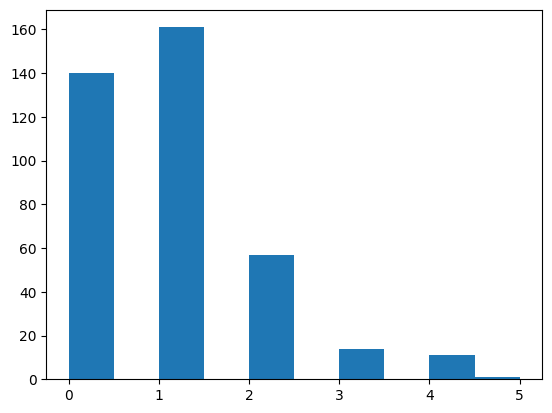

In [31]:
# Now we want to also calculate any "outliers" presumably these will be the ones with many mutations
df['# mutations'] = [len(x.split('_')) if x != '#PARENT#' else 0 for x in df['Mutations'].values]
plt.hist(df['# mutations'])

Text(0.5, 1.0, '# Mutations')

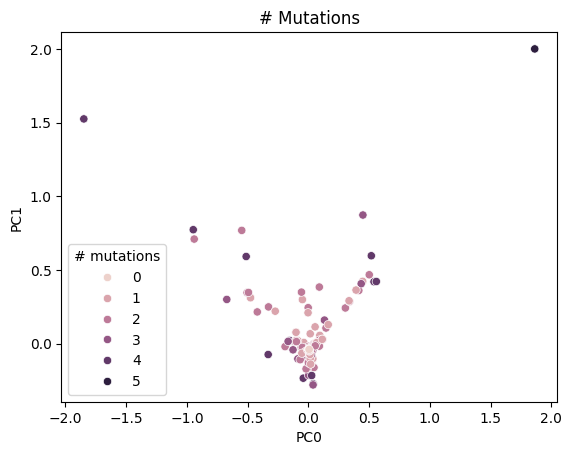

In [34]:
sns.scatterplot(ttdf, x='PC0', y='PC1', hue='# mutations')
plt.title('# Mutations')

Text(0.5, 1.0, 'Alignment count')

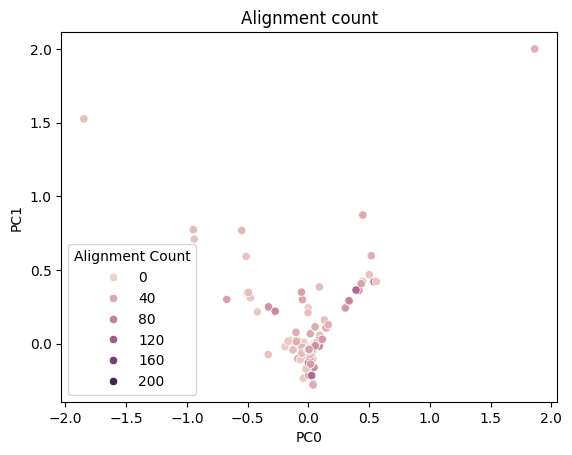

In [26]:
import seaborn as sns
sns.scatterplot(ttdf, x='PC0', y='PC1', hue='Alignment Count')
plt.title('Alignment count')

# Number of mutations

Text(0.5, 1.0, 'Cis')

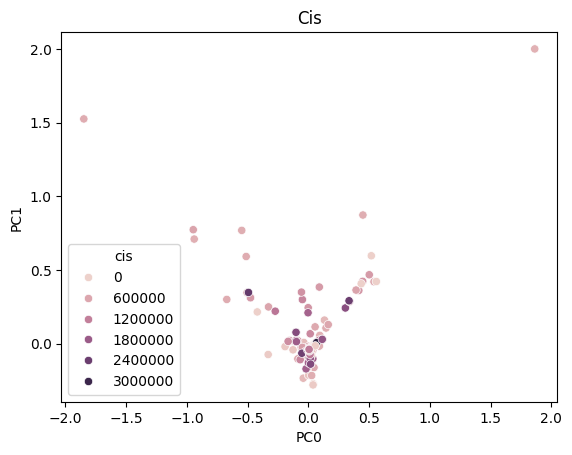

In [27]:
sns.scatterplot(ttdf, x='PC0', y='PC1', hue='cis')
plt.title('Cis')

Text(0.5, 1.0, 'Trans')

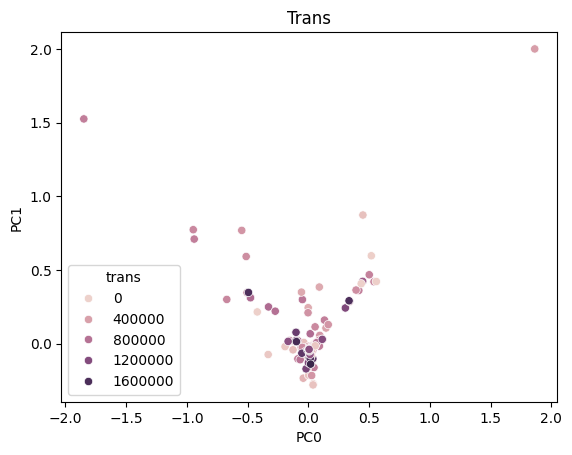

In [30]:
sns.scatterplot(ttdf, x='PC0', y='PC1', hue='trans')
plt.title('Trans')

Text(0.5, 1.0, 'Normalised Activity')

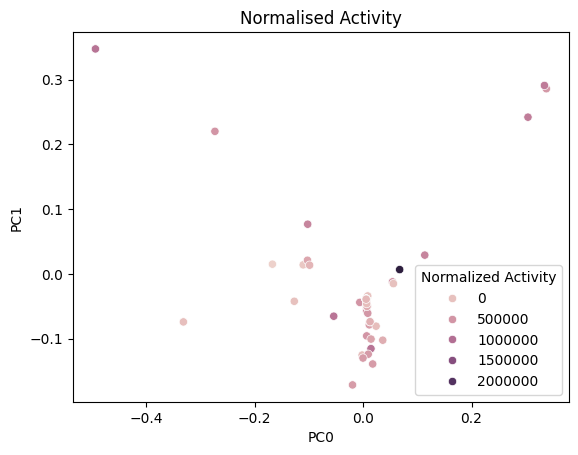

In [28]:
sns.scatterplot(ttdf, x='PC0', y='PC1', hue='Normalized Activity')
plt.title('Normalised Activity')

In [ ]:
sns.scatterplot(ttdf, x='PC0', y='PC1', hue='trans')

In [ ]:
pca = make_pca(encodings)
plt.scatter(pca[:, 0], pca[:, 1], color='blue', label='Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.legend()
plt.show()

# Next blast the sequnece and then extract the annotated information for the seq

In [ ]:
parent = "MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALKGQVEDILDLWYGLQGSNQHLIYYFGDKSGRPIPQYLEAVRKRFGLWIIDTLCKPLDRQWLNYMYEIGLRHHRTKKGKTDGVDTVEHIPLRYMIAFIAPIGLTIKPILEKSGHPPEAVERMWAAWVKLVVLQVAIWSYPYAKTGEWLE"

In [ ]:
# try using blast to get 

In [38]:
# Make a MSA on the blasted sequence
file_to_align = f'{data_dir}uniprot/uniprotkb_uniref_cluster_50_UniRef50_A0_2024_05_07.fasta'
msa_file = f'{data_dir}uniprot/uniprotkb_uniref_cluster_50_UniRef50_A0_2024_05_07_msa.fasta' 
os.system(f'/Users/ariane/Documents/code/MinION/software/./clustal-omega-1.2.3-macosx --force -i "{file_to_align}" -o "{msa_file}" -v')


Using 16 threads
Read 106 sequences (type: Protein) from /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/uniprot/uniprotkb_uniref_cluster_50_UniRef50_A0_2024_05_07.fasta
Using 45 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 106 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress done. CPU time: 0.26u 0.01s 00:00:00.27 Elapsed: 00:00:00
mBed created 2 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)
Distance calculation within sub-clusters done. CPU time: 0.19u 0.00s 00:00:00.19 Elapsed: 00:00:00
Guide-tree computation (mBed) done.
Progressive alignment progress done. CPU time: 0.85u 0.50s 00:00:01.35 Elapsed: 00:00:01
Alignment written to /Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/uniprot/uniprotkb_uniref_cluster_50_UniRef50_A0_2024_05_07_msa.fasta


0